# Pima Indians Diabetes Data Set数据探索

数据说明：
Pima Indians Diabetes Data Set（皮马印第安人糖尿病数据集） 根据现有的医疗信息预测5年内皮马印第安人糖尿病发作的概率。   

数据集共9个字段: 

0列为pregnants(怀孕次数)；

1列为Plasma_glucose_concentration(口服葡萄糖耐量试验中2小时后的血浆葡萄糖浓度)；

2列为blood_pressure(舒张压,单位:mm Hg）

3列为Triceps_skin_fold_thickness(三头肌皮褶厚度,单位：mm）

4列为serum_insulin(餐后血清胰岛素,单位:mm）

5列为BMI,体重指数（体重（公斤）/ 身高（米）^2）

6列为Diabetes_pedigree_function(糖尿病家系作用)

7列为Age(年龄)

8列为Target(分类变量,0或1）
 
数据链接：https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

p.s.: Kaggle也有一个Practice Fusion Diabetes Classification任务，可以试试:)
https://www.kaggle.com/c/pf2012-diabetes

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dpath = './data/'
train = pd.read_csv(dpath + 'pima-indians-diabetes.csv')
train.head()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnants                       768 non-null int64
Plasma_glucose_concentration    768 non-null int64
blood_pressure                  768 non-null int64
Triceps_skin_fold_thickness     768 non-null int64
serum_insulin                   768 non-null int64
BMI                             768 non-null float64
Diabetes_pedigree_function      768 non-null float64
Age                             768 non-null int64
Target                          768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


该数据集已知存在缺失值，某些列中存在的缺失值被标记为0。通过这些列中指标的定义和相应领域的常识可以证实上述观点，譬如体重指数和血压两列中的0作为指标数值来说是无意义的。

In [4]:
train.shape

(768, 9)

In [5]:
train.describe()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


从结果中我们可以看到很多列的最小值为0。而在一些特定列代表的变量中，0值并没有意义，这就表明该值无效或为缺失值。具体来说，下列变量的最小值为0时数据无意义：
- 血浆葡萄糖浓度
- 舒张压
- 肱三头肌皮褶厚度
- 餐后血清胰岛素
- 体重指数

In [6]:
NaN_col_names = ['Plasma_glucose_concentration','blood_pressure','Triceps_skin_fold_thickness','serum_insulin','BMI']
np.sum(train[NaN_col_names] == 0)
# (train[NaN_col_names] == 0).sum()

Plasma_glucose_concentration      5
blood_pressure                   35
Triceps_skin_fold_thickness     227
serum_insulin                   374
BMI                              11
dtype: int64

第1、2、5列中0值较少；相比较而言，第3、4列中的0值多出数倍，接近总量的一半。

为了确保有足够的数据量来训练模型，针对不同的列需要有不同的缺失值判断策略。

## 查看每个变量的分布及其与标签之间的关系

### Target 

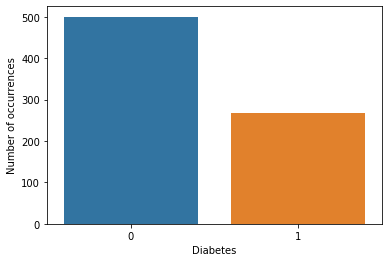

In [7]:
sns.countplot(train['Target'])
plt.xlabel('Diabetes')
plt.ylabel('Number of occurrences')
plt.show()

### 怀孕次数pregnants

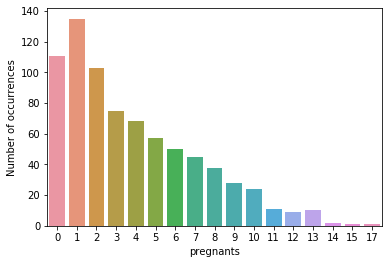

In [8]:
sns.countplot(train['pregnants'])  # 离散变量
plt.xlabel('pregnants')
plt.ylabel('Number of occurrences')
plt.show()

怀孕次数有超过17的？

但在疾病判断案例中，异常值可能就意味着得病，不能删除

ulimit = 10

删除怀孕次数大于10的样本

In [18]:
# ulimit = 10
# train = train[train['pregnants'] <= ulimit]

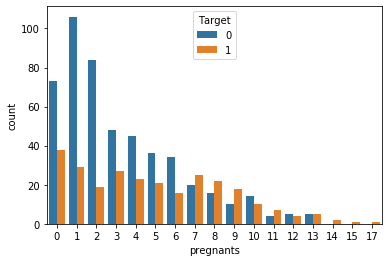

In [9]:
sns.countplot(x="pregnants", hue="Target", data=train)
plt.show()

怀孕次数和是否得病好像还真有关系！！！

### Plasma_glucose_concentration 血浆葡萄糖浓度

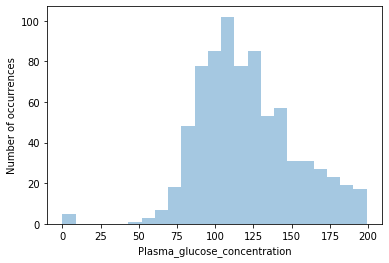

In [10]:
sns.distplot(train.Plasma_glucose_concentration, kde = False)
plt.xlabel('Plasma_glucose_concentration')
plt.ylabel('Number of occurrences')
plt.show()

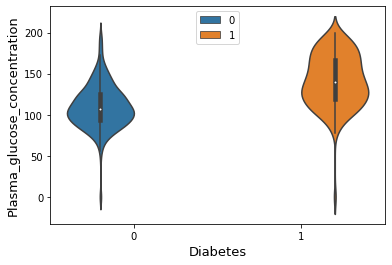

In [11]:
sns.violinplot(x='Target', y='Plasma_glucose_concentration', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=13)
plt.ylabel('Plasma_glucose_concentration', fontsize=13)
plt.legend(loc='upper center')
plt.show()

### blood_pressure

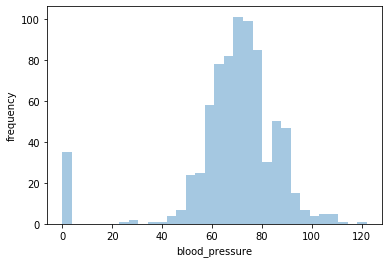

In [12]:
sns.distplot(train.blood_pressure, kde = False)
plt.xlabel('blood_pressure')
plt.ylabel('frequency')
plt.show()

血压为0？

**查看blood_pressure与标签之间的关系**

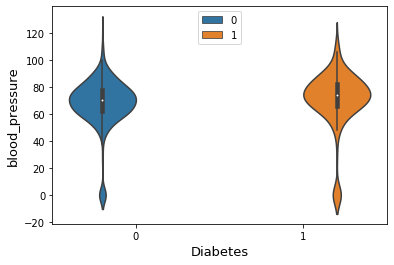

In [13]:
sns.violinplot(x='Target', y='blood_pressure', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=13)
plt.ylabel('blood_pressure', fontsize=13)
plt.legend(loc='upper center')
plt.show()

### Triceps_skin_fold_thickness 三头肌皮褶厚度（单位：mm）

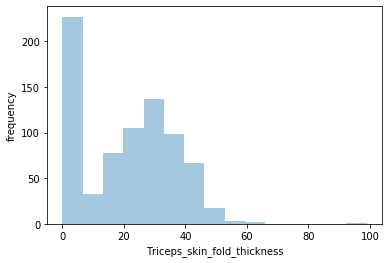

In [14]:
sns.distplot(train.Triceps_skin_fold_thickness, kde = False)
plt.xlabel('Triceps_skin_fold_thickness')
plt.ylabel('frequency')
plt.show()

Looks like there are some outliers in this feature. So let us remove them and then plot again.

但在疾病判断案例中，异常值可能就意味着得病，不能删除

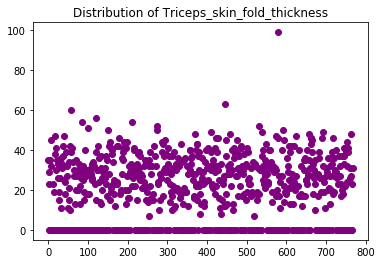

In [15]:
# ulimit = 80
# train = train[train['Triceps_skin_fold_thickness'] < ulimit]

plt.scatter(range(train.shape[0]), train["Triceps_skin_fold_thickness"].values, color='purple')
plt.title("Distribution of Triceps_skin_fold_thickness")
plt.show()

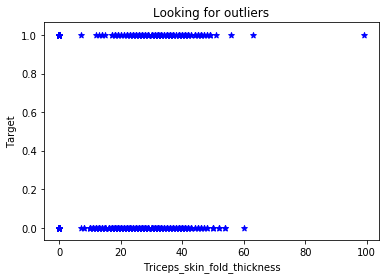

In [17]:
# 离群点（outliers）检测
plt.scatter(train.Triceps_skin_fold_thickness, train.Target, c = "blue", marker = "*")
plt.title("Looking for outliers")
plt.xlabel("Triceps_skin_fold_thickness")
plt.ylabel("Target")
plt.show()

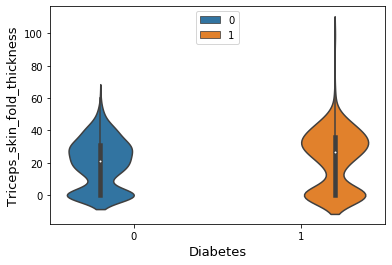

In [18]:
sns.violinplot(x='Target', y='Triceps_skin_fold_thickness', hue='Target', data=train)
plt.xlabel('Diabetes', fontsize=13)
plt.ylabel('Triceps_skin_fold_thickness', fontsize=13)
plt.legend(loc='upper center')
plt.show()

### serum_insulin 餐后血清胰岛素（单位:mm）

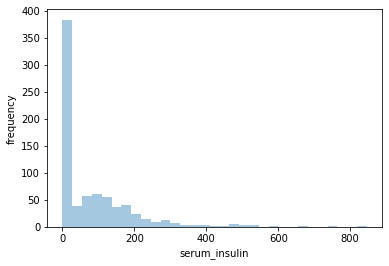

In [19]:
sns.distplot(train.serum_insulin, kde = False)
plt.xlabel('serum_insulin')
plt.ylabel('frequency')
plt.show()

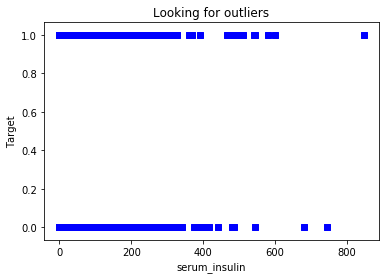

In [20]:
# 离群点（outliers）检测
plt.scatter(train.serum_insulin, train.Target, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("serum_insulin")
plt.ylabel("Target")
plt.show()

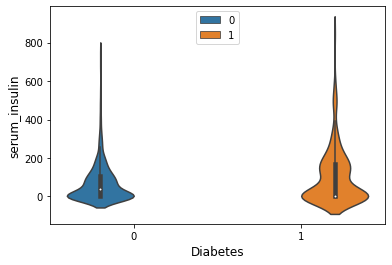

In [21]:
# serum_insulin与标签之间的关系
sns.violinplot(x='Target', y='serum_insulin', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('serum_insulin', fontsize=12)
plt.legend(loc='upper center')
plt.show()

### BMI

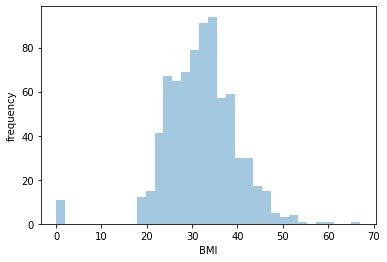

In [23]:
sns.distplot(train.BMI, kde = False)
plt.xlabel('BMI')
plt.ylabel('frequency')
plt.show()

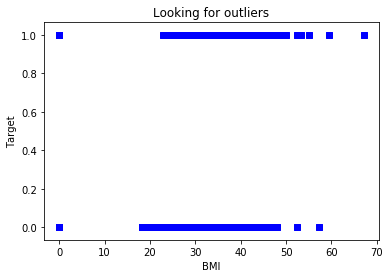

In [24]:
# 离群点（outliers）检测
plt.scatter(train.BMI, train.Target, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("BMI")
plt.ylabel("Target")
plt.show()

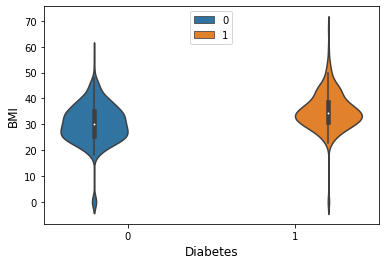

In [25]:
sns.violinplot(x='Target', y='BMI', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.legend(loc='upper center')
plt.show()

BMI=0？
为缺失值

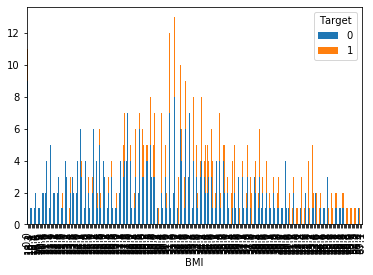

In [26]:
BMIDF = train.groupby(['BMI', 'Target'])['BMI'].count().unstack('Target').fillna(0)
BMIDF[[0,1]].plot(kind='bar', stacked=True)
plt.show()

### Diabetes_pedigree_function，糖尿病家系作用

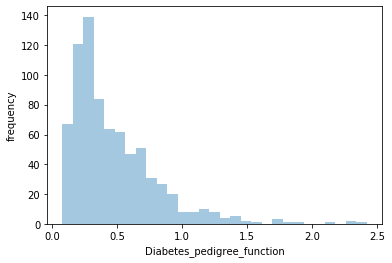

In [27]:
sns.distplot(train.Diabetes_pedigree_function, kde = False)
plt.xlabel('Diabetes_pedigree_function')
plt.ylabel('frequency')
plt.show()

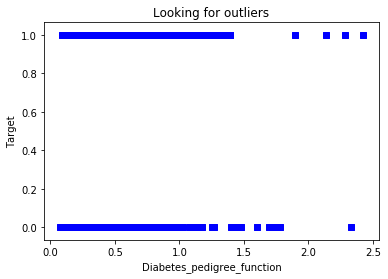

In [28]:
# 离群点（outliers）检测
plt.scatter(train.Diabetes_pedigree_function, train.Target, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("Diabetes_pedigree_function")
plt.ylabel("Target")
plt.show()

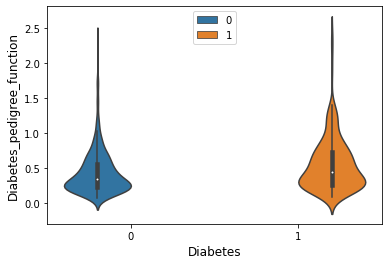

In [29]:
sns.violinplot(x='Target', y='Diabetes_pedigree_function', data=train, hue="Target")
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Diabetes_pedigree_function', fontsize=12)
plt.legend(loc='upper center')
plt.show()

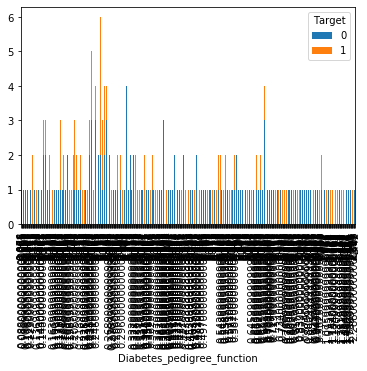

In [30]:
D=train.groupby(['Diabetes_pedigree_function','Target']).Diabetes_pedigree_function.count().unstack('Target').fillna(0)
D[[0,1]].plot(kind='bar', stacked=True)
plt.show()

### Age

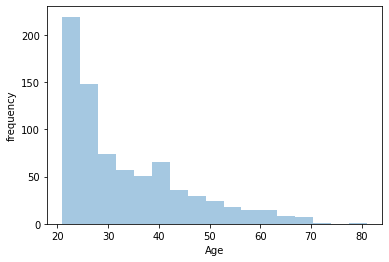

In [31]:
sns.distplot(train.Age, kde = False)
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

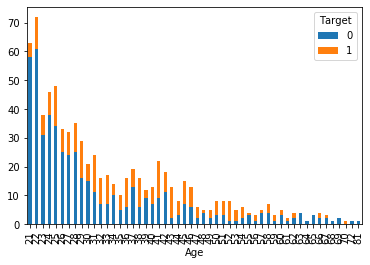

In [32]:
DF = train.groupby(['Age', 'Target'])['Age'].count().unstack('Target').fillna(0)
DF[[0,1]].plot(kind='bar', stacked=True)
plt.show()

## 特征之间的相关性

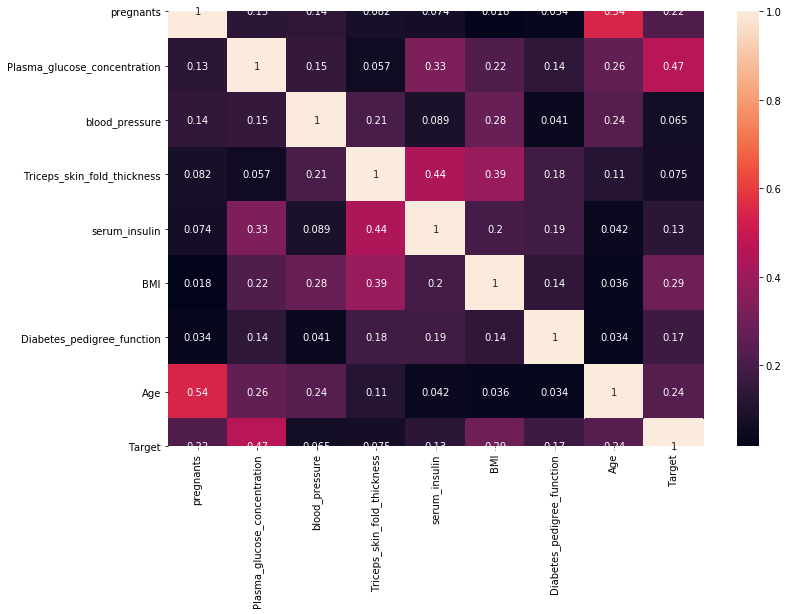

In [33]:
feat_corr = train.corr().abs()

plt.figure(figsize=(12, 8))
sns.heatmap(feat_corr, annot=True)
plt.show()

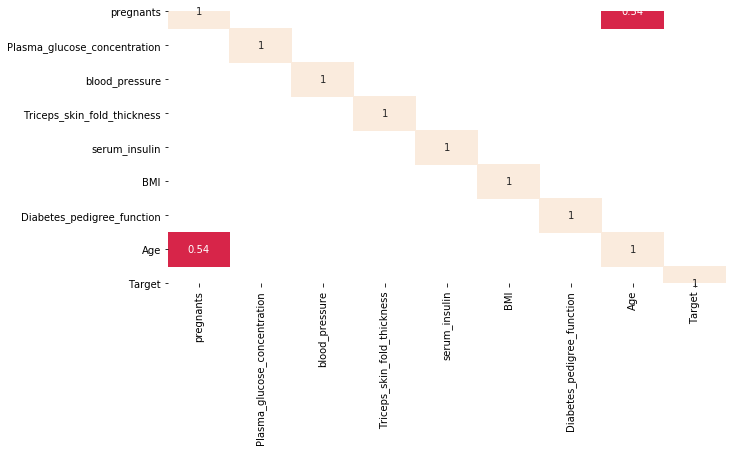

In [34]:
# Mask unimportant features
plt.figure(figsize=(10, 5))
sns.heatmap(feat_corr, mask=feat_corr<0.5, annot=True, cbar=False)
plt.show()

In [35]:
# Set the threshold to select only highly correlated attributes
threshold = 0.5
# List of pairs along with correlation above threshold
corr_list = []
size = feat_corr.shape[0]

# Search for the highly correlated pairs
for i in range(0, size):
    for j in range(i+1, size):
        if (feat_corr.iloc[i, j] >= threshold and feat_corr.iloc[i, j] < 1) or (feat_corr.iloc[i, j] < 0 and feat_corr.iloc[i, j] <= -threshold):
            corr_list.append([feat_corr.iloc[i,j], i, j])  # store correlation and columns index

# Sort to show higher ones first            
s_corr_list = sorted(corr_list, key=lambda x: abs(x[0]))

# Print correlations and column names
cols = train.columns
for v, i, j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i], cols[j], v))

pregnants and Age = 0.54


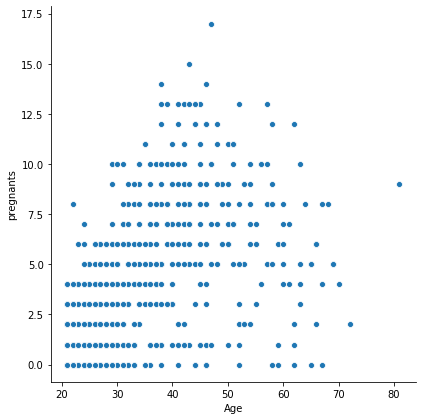

In [37]:
# Scatter plot of only the highly correlated pairs
for v, i, j in s_corr_list:
    sns.pairplot(data=train, height=6, y_vars=cols[i], x_vars=cols[j])
    plt.show()

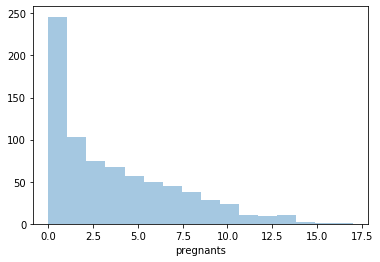

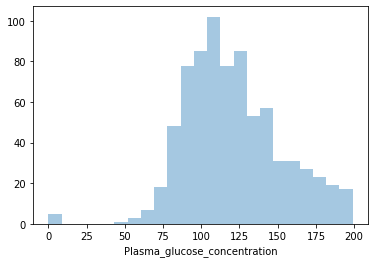

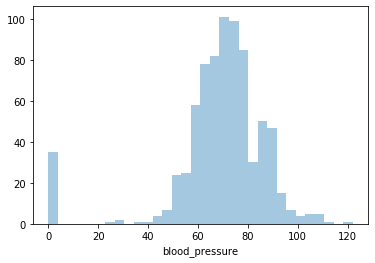

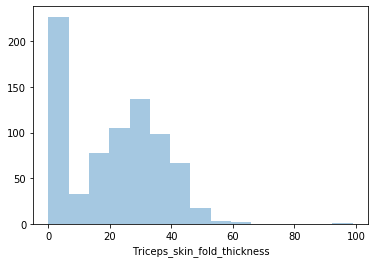

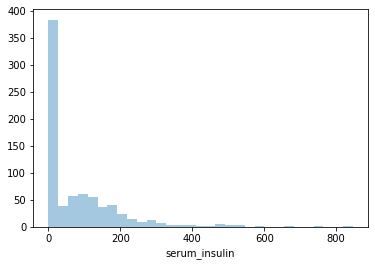

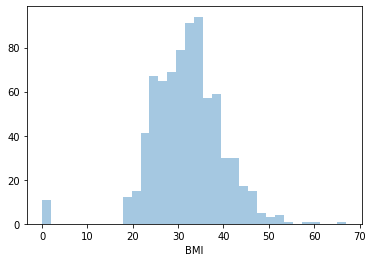

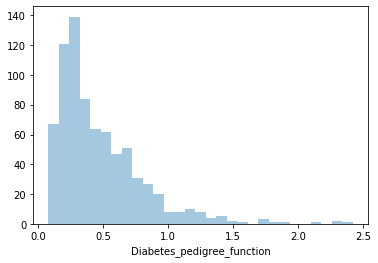

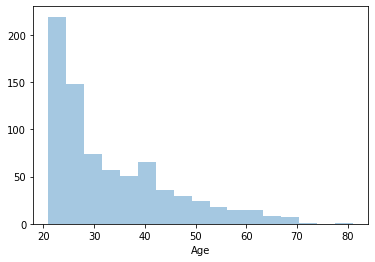

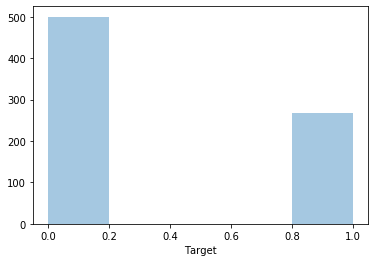

In [38]:
for feature in train.columns:
    sns.distplot(train[feature], kde = False)
    plt.show()